# Introdução ao Projeto 2 - Ciência dos dados 2021.2

O projeto propõe a crição de um classificador - modelo de classificalçao ou de regressão - capaz de prever uma variável target ou uma variável contínua. 

O primeiro passo do projeto foi encontrar uma base de dados adequada. O site Taggle, que contém informações sobre a potabilidade da água com base em suas propriedades e elementos nela contidos.
Assim, a variável target é Potability,  e as variáveis feature são todas as outras colunas presentes na base de dados, como pH, Hardness e Turbudity. 

Como a utilização de uma base de dados cuja variável target é qualitativa, e não quantitativa, a decisão tomada foi de fazer modelos de classificação, visto que são mais adequados pra esse tipo de variável.

In [1]:
from scipy.stats import norm, expon, poisson as pois, binom, uniform as uni
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RandomForestC, GradientBoostingClassifier as GradientBoostingC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm, classification_report, precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score, roc_auc_score, accuracy_score, recall_score
import statsmodels.api as sm
from statsmodels.api import Logit
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
css = '<style>.output {flex-direction: row;}</style>'
HTML(css)
pd.set_option('display.min_rows', 99999)

In [3]:
# Base de dados
df_agua = pd.read_csv('DataBase/water_potability.csv')
df_agua

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Apresentação da análise
O objetivo da análise é entender a distribuição e relação das propriedades da água, e descobrir se eles se relacionam de alguma maneira e, caso positivo, como essa interação acontece. Principalmente, a meta a ser alcançada é definir com uma determinada precisão se a água estudada é própria para consumo ou não, de acordo com sua potabilidade.



# Vendo a correlação antes de alterar algo

In [4]:
# Correlação 
corr_bruto = pd.DataFrame.from_dict({k: {i: df_agua[k].corr(df_agua[i]) for i in list(df_agua)} for k in list(df_agua)})
corr_bruto

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# Verificando se faltam dados

In [5]:
df_agua.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Como tem quase 1000 dados de sulfato faltando, é interessante analisar um pouco mais...


In [6]:
# Comparação da correlação da quantidade de sulfato com uma análise binária de valores nulos
pd.DataFrame.from_dict({'Sulfato_na': {i: df_agua['Sulfate'].isna().corr(df_agua[i]) for i in list(df_agua)}, 'Sulfato': {i: df_agua['Sulfate'].corr(df_agua[i]) for i in list(df_agua)}})

,Sulfato_na,Sulfato
ph,-0.003380,0.018203
Hardness,0.008482,-0.106923
Solids,-0.010554,-0.171804
Chloramines,0.003452,0.027244
Sulfate,NaN,1.000000
Conductivity,0.014941,-0.016121
Organic_carbon,-0.023424,0.030831
Trihalomethanes,0.011342,-0.030274
Turbidity,-0.002739,-0.011187
Potability,-0.017148,-0.023577


In [7]:
# Em qual intervalo de quantidade de sulfato tem mais água potável? 
df_agua.groupby(pd.cut(df_agua["Sulfate"], [100, 200, 300, 400, 500])).sum()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Sulfate,,,,,,,,,,
"(100, 200]",41.217291,1390.849069,2.136597e+05,62.334002,1058.232554,2714.941131,65.089762,433.041204,24.160863,6
"(200, 300]",2738.399672,93140.327891,1.150551e+07,3261.478099,129514.667820,199508.669879,6528.501431,30580.952958,1857.332158,231
"(300, 400]",11422.639189,370294.373365,4.044337e+07,13434.888267,644151.555619,801702.845009,27148.638982,117636.689146,7457.102608,675
"(400, 500]",787.115474,24727.104161,2.891779e+06,1003.752214,58046.106651,57769.857092,2006.923301,8664.492215,561.519393,73


In [8]:
# Filtrando o que é potável 
Sulf_NaN = df_agua.loc[df_agua['Sulfate'].isna()]; Sulf_NaN_Pot = Sulf_NaN['Potability'].sum()
print(f' {Sulf_NaN_Pot * 100 / Sulf_NaN.Sulfate.size}% de NaN (Sulfato) são potáveis')
print(f' {Sulf_NaN.Sulfate.size * 100 / df_agua.Sulfate.size}% das linhas não tem dados para Sulfato')

 37.516005121638926% de NaN (Sulfato) são potáveis
 23.84004884004884% das linhas não tem dados para Sulfato


In [9]:
# Médias de sulfeto nas águas potáveis e não potáveis - todas as amostras
sulfato0 = df_agua.loc[df_agua['Potability']==0]; sulfato1 = df_agua.loc[df_agua['Potability']==1]
print(f"Média de sulfato em águas nao potáveis {sulfato0['Sulfate'].sum() / sulfato0['Sulfate'].size} e em águas potáveis {sulfato1['Sulfate'].sum() / sulfato1['Sulfate'].size}, considerando todas as amostras")


Média de sulfato em águas nao potáveis 252.84888751942893 e em águas potáveis 256.3211935682007, considerando todas as amostras


In [10]:
#  Médias de sulfeto nas águas potáveis e não potáveis - apenas amostras com dados para sulfato
sulfato_semNaN = df_agua[['Sulfate', 'Potability']].dropna()
sulfato0_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==0]; sulfato1_semNaN = sulfato_semNaN.loc[sulfato_semNaN['Potability']==1]

print(f"Média de sulfato em águas não potáveis {sulfato0_semNaN['Sulfate'].sum() / sulfato0_semNaN['Sulfate'].size} e em águas potáveis {sulfato1_semNaN['Sulfate'].sum() / sulfato1_semNaN['Sulfate'].size}, considerando somente as amostras com dados para sulfato")

Média de sulfato em águas não potáveis 334.5642895786881 e em águas potáveis 332.5669902336656, considerando somente as amostras com dados para sulfato


# Considerações finais sobre a análise inicial 
*e fazer uma ligação entre ela e os outliers, além de explicar o que é isso*


Na primeira parte da análise de dados, é possível entender a correlação entre as propriedades da água, e como alguns dados são mais independentes do que outros. 

Depois, foi realizada a busca por possíveis faltas de dados, que se demonstrou eficaz em evindenciar que muita informação sobre pH, Sulfate e Trihalomethanes não estão presentes no banco de dados. Como, especialmente, o Sulfate apresentou a maior lacuna de dados entre as colunas, entendeu-se como necessário fazer uma análise mais profunda. A partir dessa análise extra, determinou-se que as lacunas serão preenchidas com a média dos dados. Para a água não potável, será a média de sulfato na água não potável, sendo essa relação válida para a água potável.

Com base nos dados gerados nesse primeiro estudo, concluimos que XXXXX,  e serão utilizados os outliers, que funcionam de modo fundamental para alguns pontos. Por exemplo: poder viesar negativamente todo o resultado de uma análise. O outliers é definido por diversos outros nomes, como: dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros. No caso do dataset escolhido, é valido dizer que os dados encontrados é o XXXXX. A forma mais simples de identificar os outliers é olhar diretamente em uma tabela ou planilha de dados, que pode-se notar as anomalias.

Contudo, quando as quantidades de observações, dita linhas, tornam para a casa do milhar ou milhão, fica impossível encontrar quais são os dados que destoam do geral. Outra forma de encontrar os outliers é através de gráficos, que acaba sendo uma das melhores formas de identificação. Isso acontece porque, ao plotar um gráfico, é claro a existência de uma anomalidade.

# Olhando Outliers

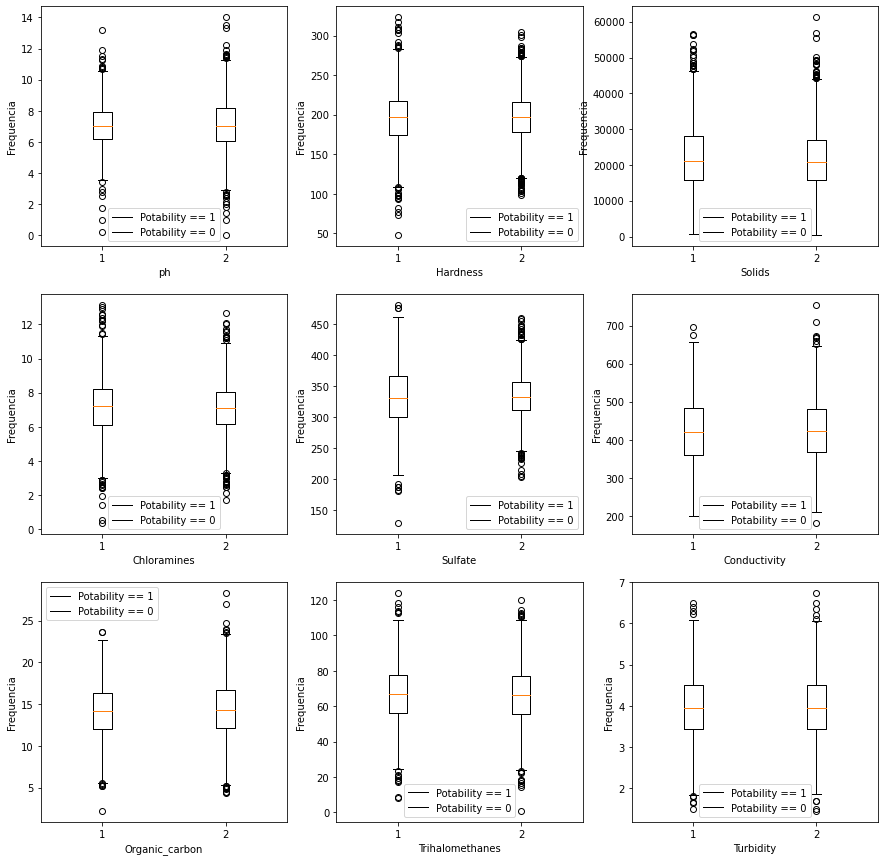

In [11]:
# Vizualizando
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua.loc[df_agua['Potability']==1][i].dropna(), df_agua.loc[df_agua['Potability']==0][i].dropna()])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [12]:
# Divindo os quantis
Q1 = df_agua.quantile(0.25)
Q3 = df_agua.quantile(0.75)
IQR = Q3 - Q1
Outliers = ((df_agua < (Q1 - 1.5 * IQR)) | (df_agua > (Q3 + 1.5 * IQR))).sum()
Outliers.sum()

366

# Com Outliers

In [13]:
# Utilizando as médias das colunas para preencher as informações faltando
df_agua1 = df_agua.copy()
df_agua1_1 = df_agua1.loc[df_agua1['Potability'] == 1]
df_agua1_0 = df_agua1.loc[df_agua1['Potability'] == 0]
for i in list(df_agua):
    df_agua1.loc[df_agua1[i] == 1] = df_agua1.loc[df_agua1[i] == 1].fillna(df_agua1.loc[df_agua1[i] == 1].mean())
    df_agua1.loc[df_agua1[i] == 0] = df_agua1.loc[df_agua1[i] == 0].fillna(df_agua1.loc[df_agua1[i] == 0].mean())
df_agua1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


# Sem Outliers

In [14]:
# Filtra os Outliers
df_agua1_Sout = df_agua1.copy()
for i in list(df_agua.columns)[:-1]:
    df_agua1_Sout = df_agua1_Sout[(df_agua1_Sout[i] >= (Q1[i] - 1.5 * IQR[i])) & (df_agua1_Sout[i] <= (Q3[i] + 1.5 * IQR[i]))]
df_agua1_Sout

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.085378,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0


In [15]:
# Verificando se faltam dados
df_agua1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
# Ajustando a correlação
corr_ajustada = pd.DataFrame.from_dict({k: {i: df_agua1[k].corr(df_agua1[i]) for i in list(df_agua1)} for k in list(df_agua1)})
corr_ajustada

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


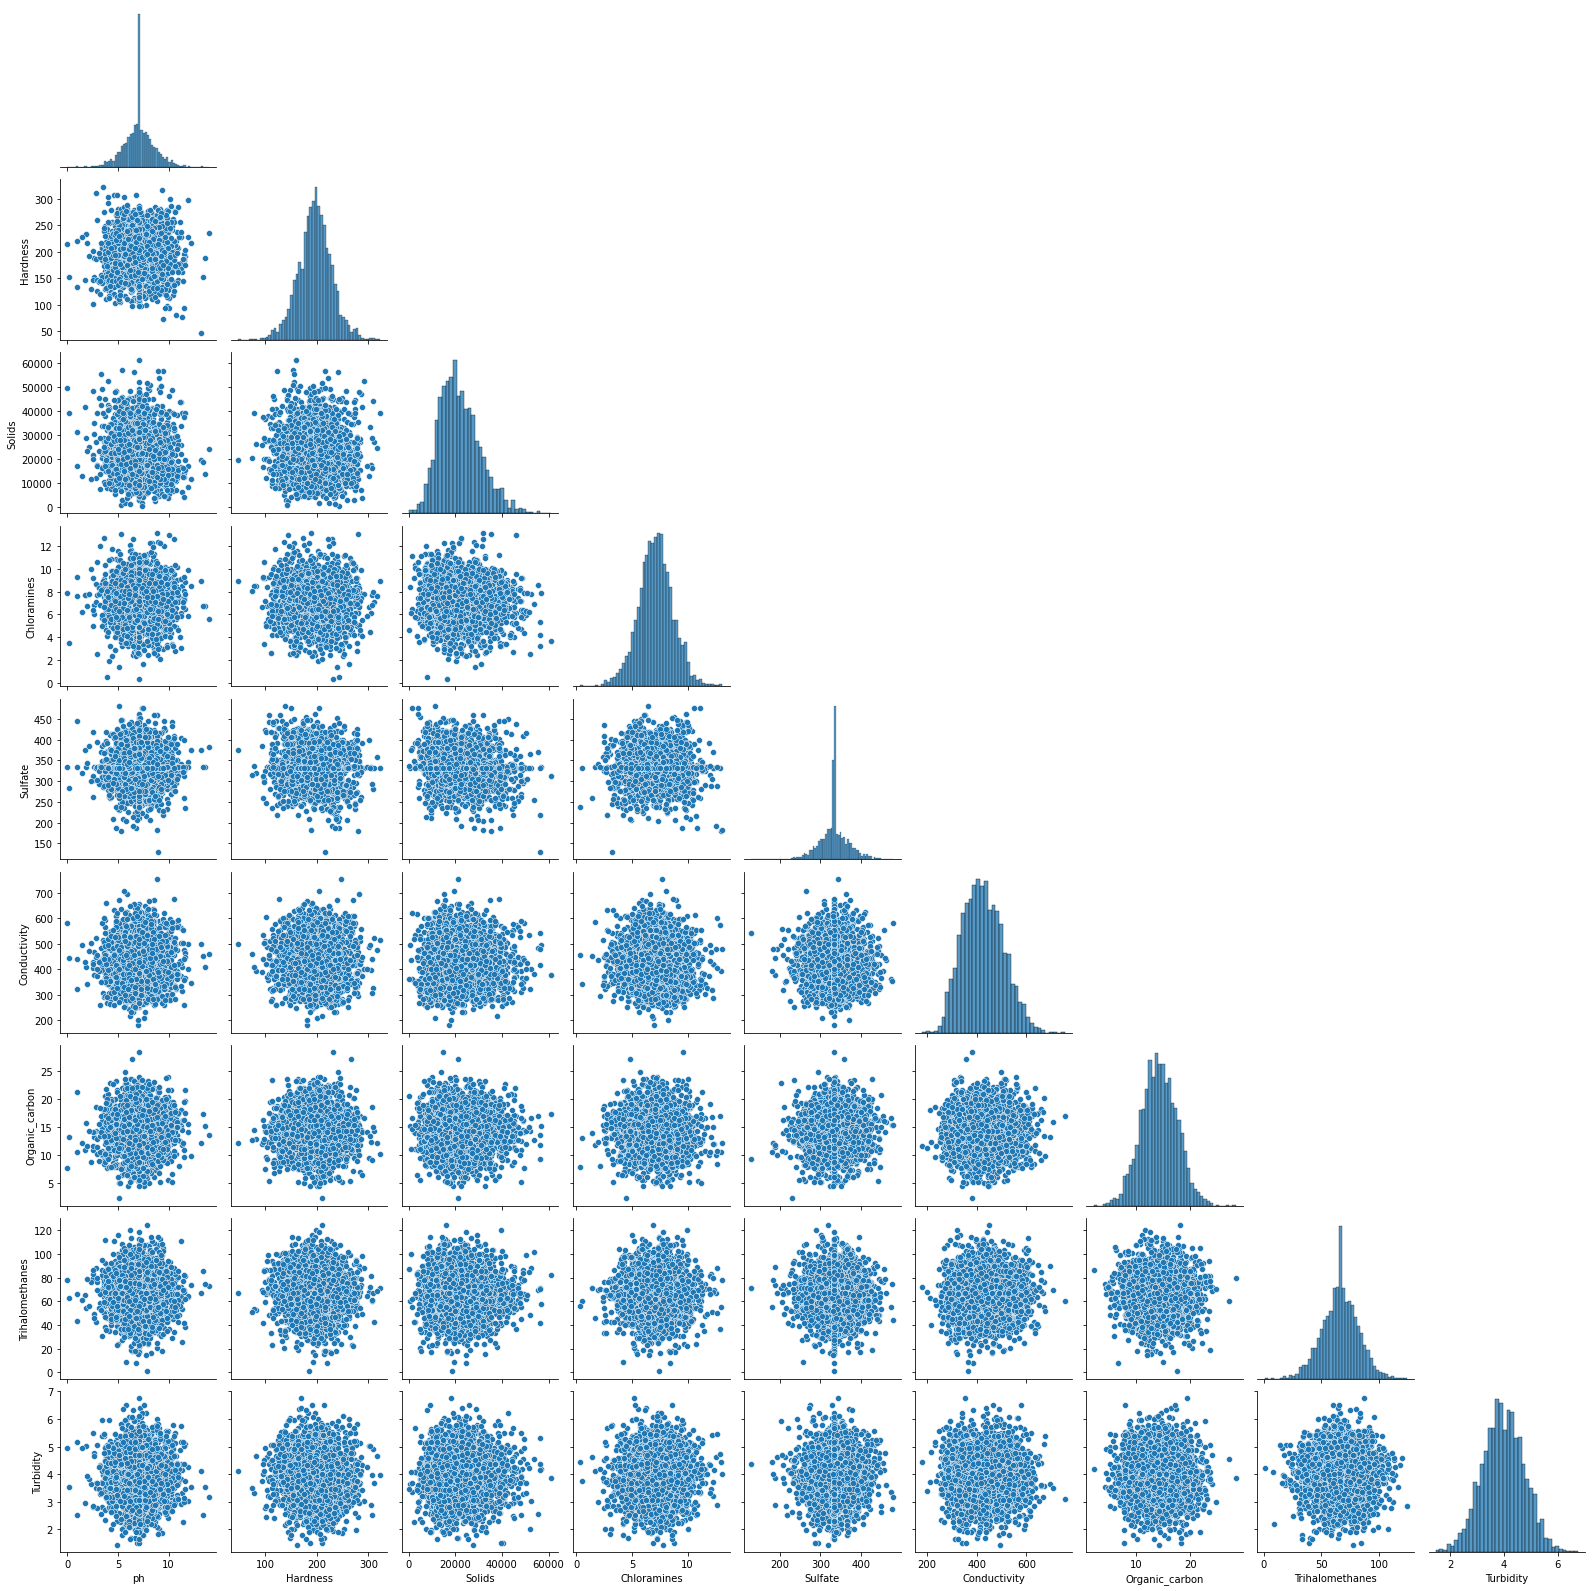

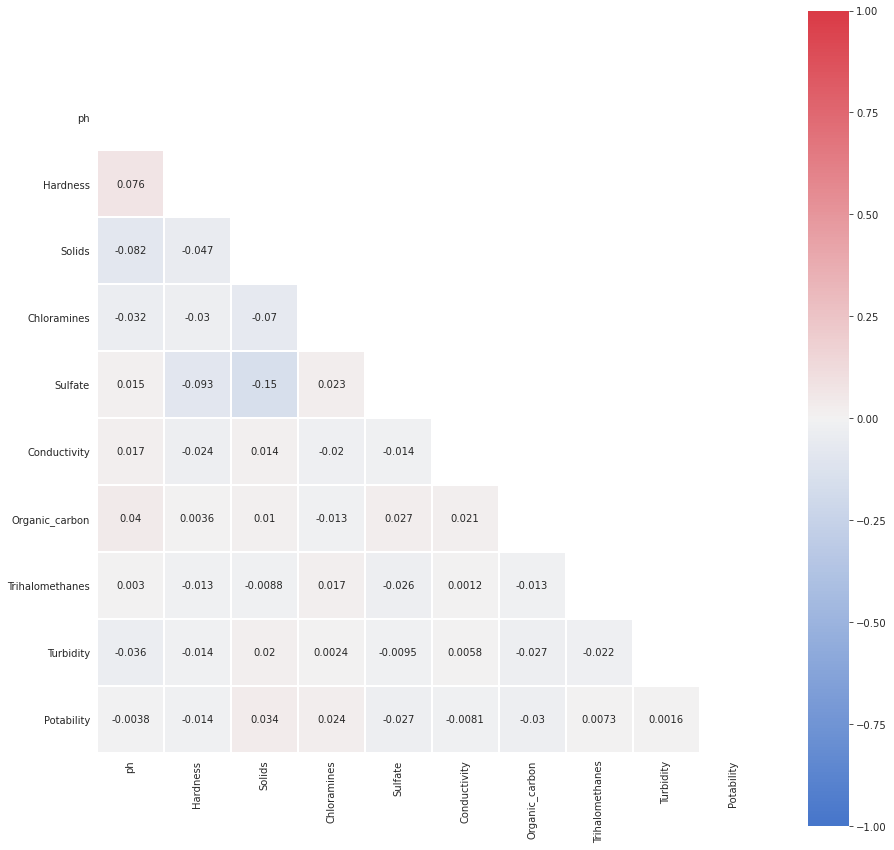

In [17]:
# Vizualizando a dispersão dos valores (correlacionando eles)
sns.pairplot(df_agua1[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], corner=True)
plt.show(block=False)
mask = np.zeros_like(corr_ajustada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15), num='corr_ajustada sem pot')
    cmap = sns.diverging_palette(255, 10, as_cmap=True)
    sns.heatmap(corr_ajustada, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, square=True, linewidths=1)
plt.show(block=False)

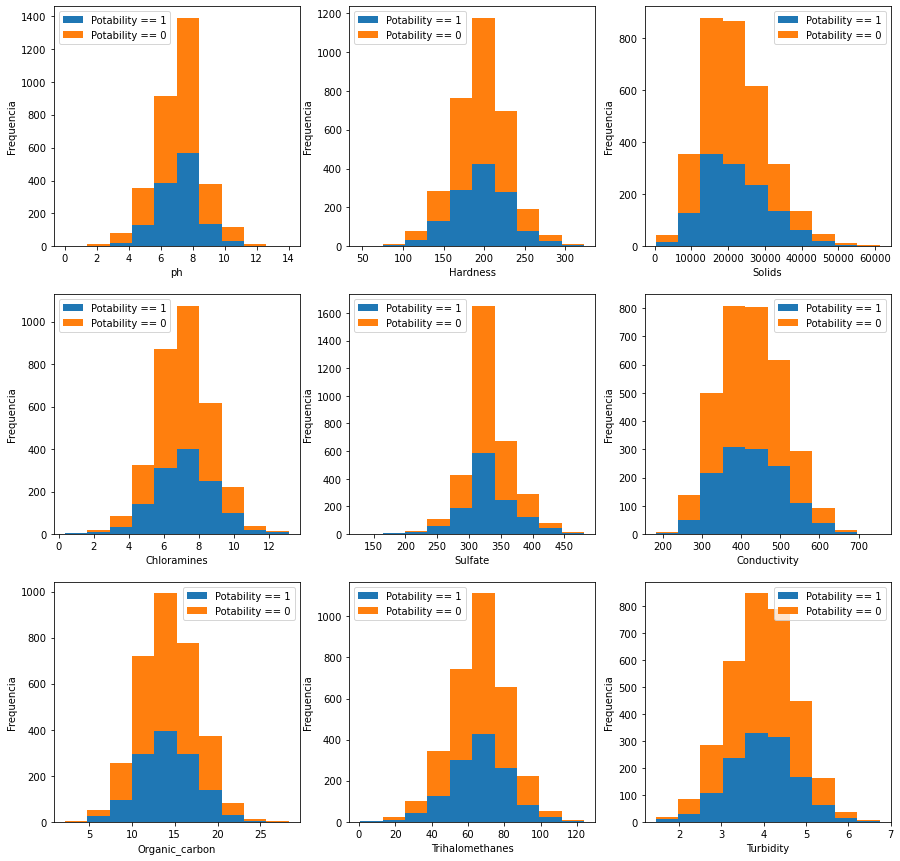

In [18]:
# Vizualizando ocorrência de potabilidade por faixa de valor de cada propriedade
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.hist([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]], stacked=True)
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

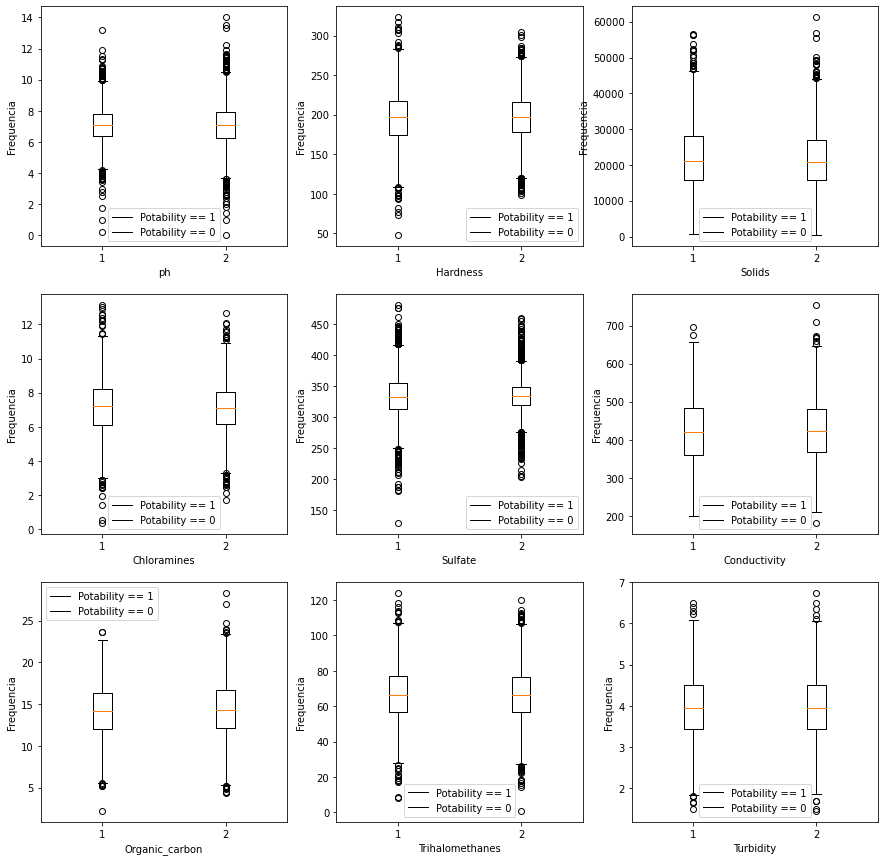

In [19]:
# Dispersão de valores com base na média
plt.figure(figsize=(15, 15), num='corr_ajustada sem pot')
n = 1
for i in ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']:
    plt.subplot(3, 3, n)
    n+=1
    plt.boxplot([df_agua1.loc[df_agua1['Potability']==1][i], df_agua1.loc[df_agua1['Potability']==0][i]])
    plt.xlabel(i)
    plt.ylabel('Frequencia')
    plt.legend(('Potability == 1', 'Potability == 0'))
plt.show()

In [20]:
# Detalhes das medidas de descrição - potável
df_agua1.loc[df_agua1['Potability'] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.073783,196.632907,21199.386614,7.215163,332.566990,420.712729,14.162809,66.539684,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [21]:
# Detalhes das medidas de descrição - não potável
df_agua1.loc[df_agua1['Potability'] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.085378,197.123423,20809.618280,7.090334,334.564290,422.229331,14.293508,66.303555,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


# Considerações finais sobre a análise *como um todo*

Ao final das 3 análises, é possível concluir que XXXXX.

Concluir que, após a identificação da correlação dos dados, verificação e preenchimento de dados ausentes, utilização e comparação de outliers, XXXXX


#  Iniciando modelos de classificação

# O que é um modelo de classificação?

O método de análise permite estimar o valor de uma determinada variável resposta (variável dependente) como função de outras variáveis preditoras (variáveis independentes).  Nele, a estimação dos mínimos quadrados ordinários – MQO é uma técnica de otimização dos quadrados do erro da regressão. 
 
Apesar de esse método de análise ser muito eficaz, é preciso haver cuidado, visto que os resultados tendem a ser enviesados. Isso acontece porque o método é ancorado em alguns pressupostos que precisam ser respeitados. No caso, os testes são todos baseados no pressuposto da normalidade. Sendo assim, se a análise de  uma variável que não possui distribuição normal com esse método, os resultados não serão satisfatórios. 

Também, é importante comentar sobre o classificador probabilístico “Naive Bayes”, um dos mais utilizados para categorizar textos com base na frequência das palavras usadas. O método pode ser usado quando os atributos que descrevem as instâncias forem condicionalmente independentes, ou seja, quando se trata sobre probabilidade condicional. O classificador se faz excelente na resolução de problemas relacionado a textos, realizando a filtragem. Além disso, o algoritmo é muito robusto nas previsões em tempo real, ainda mais por precisar de poucos dados para a realização. Contudo, caso tenha a necessidade de correlacionar fatores, classificador tende a ter falhas na predição. 

### Exibir Dados

In [22]:
def metricas(tt_spit, lista_dados):
    arrays = [['Cout','Cout','Cout','Cout','Cout','Cout','Cout','Cout','Sout','Sout','Sout','Sout','Sout','Sout','Sout','Sout'],['Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste','Vp','Vn','Fp','Fn','acuracia_treino','acuracia_teste','precision_treino','precision_teste']]
    tuples = list(zip(*arrays))
    dic_ite = [[] for i in range(len(tt_spit[0]))]
    index = ['iteracao' + str(i+1) for i in range(len(tt_spit[0]))]
    columns = pd.MultiIndex.from_tuples(tuples)
    for j in range(len(tt_spit)):
        print('Cout' if j == 0 else 'Sout')
        plt.figure(figsize=(20, 20), num=''.join('Cout' if j == 0 else 'Sout'))
        n=1
        acuracia_treino = [i[0][0] for i in lista_dados[j]]
        acuracia_teste = [i[0][1] for i in lista_dados[j]]
        predicao = [i[0][2] for i in lista_dados[j]]
        precision_treino = [i[1][0] for i in lista_dados[j]]
        precision_teste = [i[1][1] for i in lista_dados[j]]
        for i in range(len(tt_spit[j])):
            Train_X = tt_spit[j][i][0]; Test_X = tt_spit[j][i][1]; Train_Y = tt_spit[j][i][2]; Test_Y = tt_spit[j][i][3]
            Vn, Fp, Fn, Vp = cm(Test_Y, predicao[i]).ravel()
            dic_ite[i].append(Vp)
            dic_ite[i].append(Vn)
            dic_ite[i].append(Fp)
            dic_ite[i].append(Fn)
            dic_ite[i].append(acuracia_treino[i])
            dic_ite[i].append(acuracia_teste[i])
            dic_ite[i].append(precision_treino[i])
            dic_ite[i].append(precision_teste[i])
            plt.subplot(3, 4, n)
            mc = cm(Test_Y, predicao[i])
            cmap = sns.diverging_palette(255, 10, as_cmap=True)
            sns.heatmap(mc, cmap=cmap, annot=True, square=True, linewidths=1)
            plt.title(f'iteracao {n}\nacuracia {acuracia_teste[i]}')
            plt.xlabel('Classificação do Classificador')
            plt.ylabel('Classificação real')
            n+=1
        plt.subplot(3, 4, 12)
        plt.hist([round(i) for i in acuracia_teste])
        plt.xlabel('Acuracia')
        plt.ylabel('Frequencia')
        plt.show()
    df = pd.DataFrame(dic_ite, index=index, columns=columns)
    df[('Cout-Sout','acuracia_treino')] = df[('Cout','acuracia_treino')] - df[('Sout','acuracia_treino')]
    df[('Cout-Sout','acuracia_teste')] = df[('Cout','acuracia_teste')] - df[('Sout','acuracia_teste')]
    df[('Cout-Sout','precision_treino')] = df[('Cout','precision_treino')] - df[('Sout','precision_treino')]
    df[('Cout-Sout','precision_teste')] = df[('Cout','precision_teste')] - df[('Sout','precision_teste')]
    return df

## Random Forest Classifier. 

Começando pelo nome, o classificador Random Forest já contém a palavra "aleatório", que denota o comportamento do algortimo ao selecionar subconjuntos de features e montar árvores de decisão. Já com o segundo nome, Forest, significa floresta, representando a grande quantidade de árvores de decisão geradas. Para funcionar, o algoritmo realiza uma seleção aleatória de algumas fontes, da feature mais adequada para a posição do nó raiz, gera os nós filhos e acaba repetindo esse processo até atingir a quantidade de arvores desejada no projeto. Após a geração do modelo, as previsões são feitas tendo a partir de uma espécie de votação. Cada árvore realiza uma decisão a partir dos dados apresentados. Desse modo, a decisão que possuir mais votos é a resposta do algortimo. O Random Forest é, relativamente, de fácil entendimento de seu funcionamento, bastante útil para resolver problemas de regressão e classificação, apresentando resultados satisfatórios em situações variadas, com um bom desenpenho, e possui implementações em várias bibliotecas de IA disponível atualmente.


In [23]:
def RF_Clf(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_score = RF_clf.score(Train_X, Train_Y)*100
    RF_test_score = RF_clf.score(Test_X, Test_Y)*100
    RF_train_pred = RF_clf.predict(Train_X)
    RF_test_pred = RF_clf.predict(Test_X)
    RF_train_Recalscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_Recalscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Recalscore, RF_test_Recalscore]]

## XGBoost Classifier. 

O XGBoost é um algoritmo de aprendizado de máquina, tambem baseado em árvores de decisão e que faz uso de uma estrutura de Gradiente boosting. Esse algoritmo é satisfatório pois pode ser usado em uma variedade de situações, , como regressão, classificação, ranqueamento, entre outros, além de ser compatível nos 3 sistemas operacionais mais comuns - Windows, Linux e OS X. Outra vantagem é que ele suporta as prinipais linguagens de programação - no caso desse projeto: Python. Seu algoritmo de gradiente descendente é capaz de minimizar erros, combinando técnicas de otimização de software e hardware para otimizar os recursos computacionais em menos tempo.


In [24]:
def XGB_Clf(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = GradientBoostingC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_score = XGB_clf.score(Train_X, Train_Y)*100
    XGB_test_score = XGB_clf.score(Test_X, Test_Y)*100
    XGB_train_pred = XGB_clf.predict(Train_X)
    XGB_test_pred = XGB_clf.predict(Test_X)
    XGB_train_precision_score = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_precision_score = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_precision_score, XGB_test_precision_score]]

## Logistic Regression.
*Explicação de como funciona a regressão geral. Depois, sobre a linear em específico*

A regressão logística é um algoritmo utilizado para classificação. O nome regressão está ligado ao fato da Regressão Logística ter uma construção a partir de uma aplicação de uma transformação, que é denominada função logística ou sgmoide sobre a regressão linear.

Quando lidamos com um problema de regressão, a variável alvo (resultado da predição) pode cair dentro do intervalo dos números reais. Já o objetivo da regressão linear é encontrar a equação da reta que melhor se ajusta ao conjunto de dados **, com caso,** encontrar a combinação dos coeficientes linear e angulares, que assim diminuirá os erros de predição. Contudo, não faz sentido aplicar a técnica de regressão linear para prever rótulos e não valores quantitativos. Mas as vantagens de trabalhar com o modelo de regressão logística é que ele não atua somente como um classificador, podendo também fornecer valores de probabilidade para cada instância classificada. O modelo também é relativamente fácil de implementar, interpretar, é rápido e possui um bom desempenho, principalmente quando os dados são linearmente separáveis. Outro fato, mas não menos importante é  que os coeficientes da regressão logística dão a ideia do quão relevante é um atributo para a predição e também a direção de associação com a variável alvo sendo ela positiva ou negativa. As desvantagens é que embora seja menos suscetível a overfitting que outros algoritmos de classificação, esse problema ainda pode ocorrer quando o modelo é submetido a data sets de alta dimensionalidade. Outra questão é requer uma atenção maior com o pré-processamento dos dados quando comparado a outros modelos de classificação.


In [25]:
def LogReg(Train_X, Test_X, Train_Y, Test_Y):
    Log_reg = Logit(Train_Y, Train_X).fit(disp=0)
    LR_train_pred = Log_reg.predict(Train_X)
    LR_test_pred = Log_reg.predict(Test_X)
    LR_train_precisionscore = precision_score(Train_Y, round(LR_train_pred))*100
    LR_test_precisionscore = precision_score(Test_Y, round(LR_test_pred))*100
    return [[accuracy_score(Train_Y, round(LR_train_pred))*100, accuracy_score(Test_Y, round(LR_test_pred))*100, round(LR_test_pred)], [LR_train_precisionscore, LR_test_precisionscore]]

## Neural Network. 

O Neural Network - NNA se baseia no funcionamento na rede neural humana, esse algoritmo pode ser usado para fazer predição numérica ou de classificação, resolvendo problemas supervisionados e não-supervisionados. Mas para um entendimento melhor sobre seu funcionamento, é bom pensar como nosso cérebro funciona para assim de fato termos uma notação melhor de como funciona a função. Os neurônios se comunicam através de sinapses, que acontece onde dois neurônios entram em contato. Os impulsos recebidos por um neurônio A, em um determinado momento, são processados, e atingindo um dado início de ação, o neurônio A dispara, produzindo uma substância que flui para o axônio, que pode estar conectado a um dendrito de um outro neurônio B. O impulso pode diminuir ou aumentar a polaridade da membrana pós-sináptica, inibindo ou excitando a geração dos pulsos no neurônio B. Este processo depende de vários fatores, como a geometria da sinapse e o tipo de neurotransmissor, a neural network tem o mesmo raciocínio, porém, funciona com inputs, que são como se fossem os estímulos ou impulsos, enviados para os neurônios que são descritos com Hidden, depois de recebido o impulso, ele é processado e é enviado para gerar três resultados, cada neurônio é representado por um valor que varia entre 0 e 1 e esse valor é definido por influência de 4 variáveis que são utilizados na sinapse sendo eles: o input, que são valores alimentados no modelo; peso, que é um valor pré definido  que varia de acordo com as iterações; bias, que é também um valor mas ele soma ao final pois serve para calibrar o valor final e a função de ativação que irá colocar os valores dentro do range 0 e 1. O NNA normalmente possui inúmeras camadas escondidas que é o (Hidden Layear) ou neurônios. A função de ativação é onde transforma-se o valor da fórmula de NNA em um valor entre 0 e 1, mas sabendo que existem 6 tipos de função ativação, vamos ver alguns de exemplos e explicar o básico, sendo elas:
 Função Logística ou Sigmoid: normalmente usada para problemas de predição da probabilidade já que é de se esperar valores no mesmo intervalo. A função sigmoid é uma das mais utilizadas hoje em dia, entretanto, existe alguns problemas na função sendo um deles, pode ficar presa na fase de treino, fazendo com que a utilização da função softmax jája mais adequada mesmo sendo mais generalista.
 Função Tanh: a função não é linear e varia entre 1 e -1, sendo assim não precisando se preocupar em estourar o resultado. 
 Função Relu: ela tem um comportamento linear, no entanto ela é de natureza não linear representando valores entre 0 e +inf.
 Função Softplus: ela é uma variação da Relu, só que mais suave e a sua derivada origina uma função logística.


De forma com que no caso do nosso projeto, utilizamos (________________________).


In [26]:
def my_neural_network(Train_X, Test_X, Train_Y, Test_Y, optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, epochs=50, batch_size=1, verbose=1):

    normalizer = StandardScaler().fit(Train_X)

    Train_X = normalizer.transform(Train_X)

    Test_X = normalizer.transform(Test_X)

    model = Sequential()

    model.add(Dense(units=16, activation='relu', input_shape=(9,)))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics, loss_weights=loss_weights, weighted_metrics=weighted_metrics, run_eagerly=run_eagerly, steps_per_execution=steps_per_execution)

    model.fit(Train_X, Train_Y, epochs=epochs, batch_size=batch_size, verbose=verbose)

    Predict_Y = model.predict(Test_X)
    score = model.evaluate(Test_X, Test_Y,verbose=1, return_dict=True)
    return score

# Rodando os classificadores

In [27]:
listaCout_tts = []; listaSout_tts = []; lista_tts = [[], []]; lista_RF = [[], []]; lista_XGB = [[], []]; lista_LR = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts[0].append(ttCout_split)
    lista_tts[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_LR[0].append(LogReg(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_LR[1].append(LogReg(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LariLari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning

## Random Forest
*Descrever as expectativas para os resultados gerados. Lembrando que os primeiros gráficos são com outliers, e os segundo sem. O que nós achamos sobre os resultados gerados?*

Cout


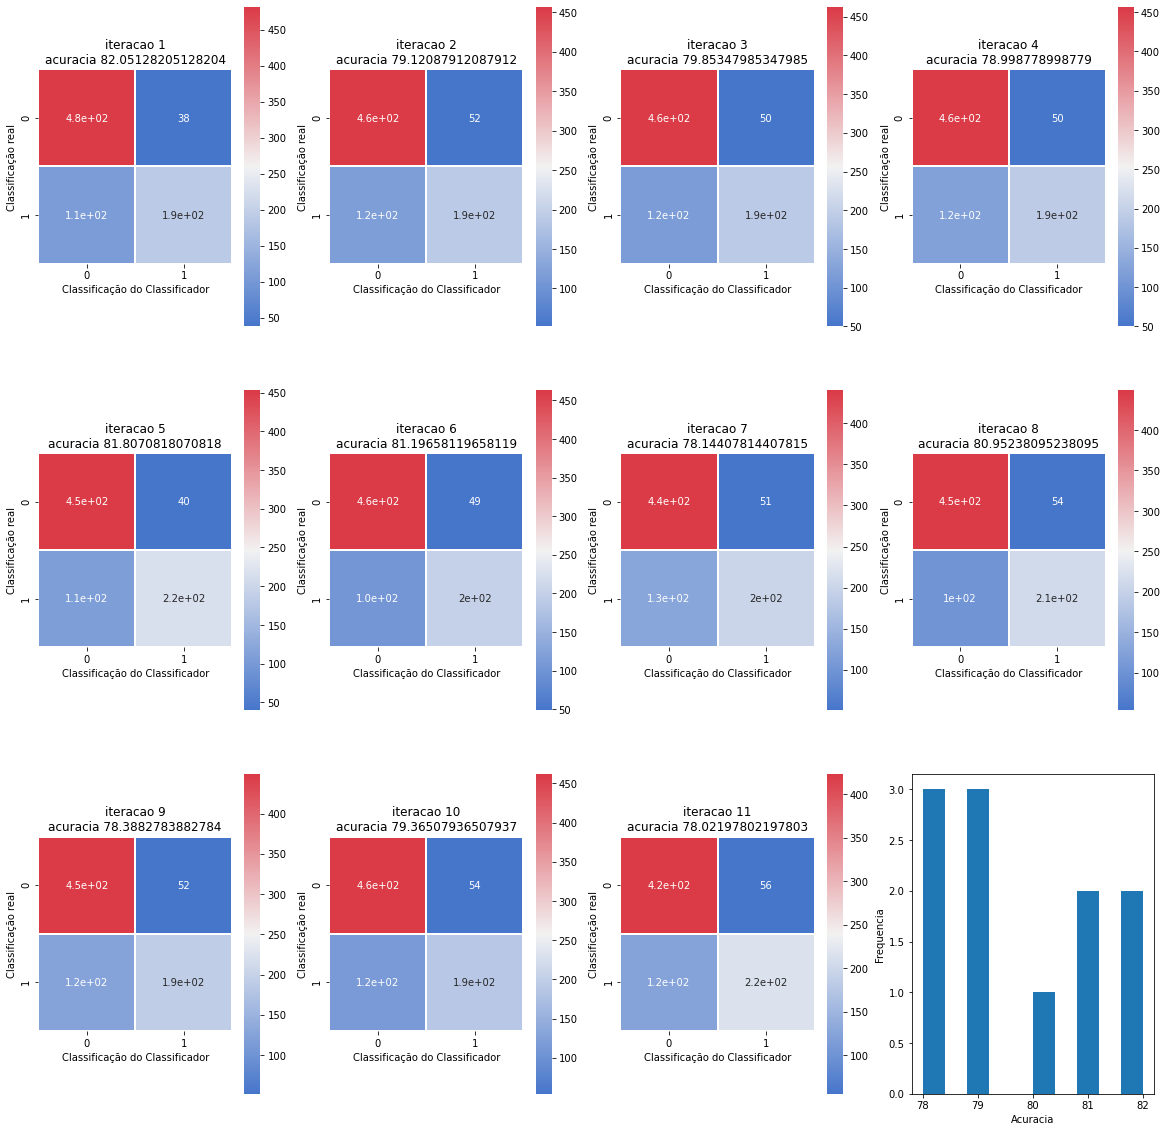

Sout


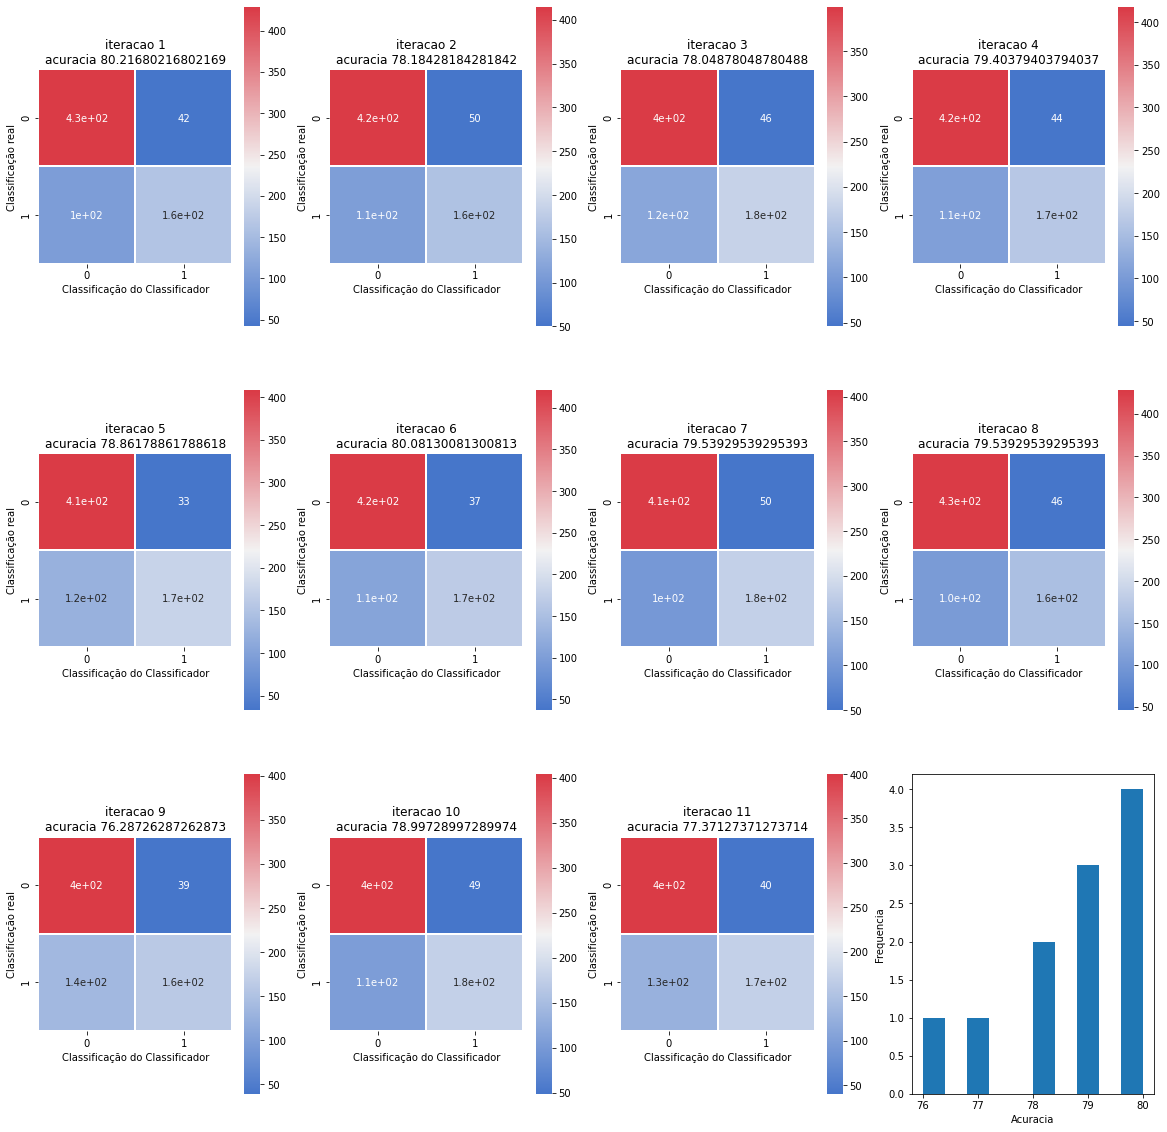

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   190  482  38  109           100.0      82.051282            100.0   
iteracao2   191  457  52  119           100.0      79.120879            100.0   
iteracao3   191  463  50  115           100.0      79.853480            100.0   
iteracao4   190  457  50  122           100.0      78.998779            100.0   
iteracao5   217  453  40  109           100.0      81.807082            100.0   
iteracao6   202  463  49  105           100.0      81.196581            100.0   
iteracao7   200  440  51  128           100.0      78.144078            100.0   
iteracao8   214  449  54  102           100.0      80.952381            100.0   
iteracao9   193  449  52  125           100.0      78.388278            100.0   
iteracao10  188  462  54  115           100.0      79.365079            100.0   
iteracao11  216  423  56  124           100.0      78.021978            100.0   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        83.333333  163  429  42  104           100.0      80.216802   
iteracao2        78.600823  162  415  50  111           100.0      78.184282   
iteracao3        79.253112  177  399  46  116           100.0      78.048780   
iteracao4        79.166667  168  418  44  108           100.0      79.403794   
iteracao5        84.435798  174  408  33  123           100.0      78.861789   
iteracao6        80.478088  170  421  37  110           100.0      80.081301   
iteracao7        79.681275  180  407  50  101           100.0      79.539295   
iteracao8        79.850746  159  428  46  105           100.0      79.539295   
iteracao9        78.775510  161  402  39  136           100.0      76.287263   
iteracao10       77.685950  179  404  49  106           100.0      78.997290   
iteracao11       79.411765  171  400  40  127           100.0      77.371274   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1             100.0       79.512195             0.0       1.834480   
iteracao2             100.0       76.415094             0.0       0.936597   
iteracao3             100.0       79.372197             0.0       1.804699   
iteracao4             100.0       79.245283             0.0      -0.405015   
iteracao5             100.0       84.057971             0.0       2.945293   
iteracao6             100.0       82.125604             0.0       1.115280   
iteracao7             100.0       78.260870             0.0      -1.395217   
iteracao8             100.0       77.560976             0.0       1.413086   
iteracao9             100.0       80.500000             0.0       2.101016   
iteracao10            100.0       78.508772             0.0       0.367789   
iteracao11            100.0       81.042654             0.0       0.650704   

                                             
           precision_treino precision_teste  
iteracao1               0.0        3.821138  
iteracao2               0.0        2.185729  
iteracao3               0.0       -0.119085  
iteracao4               0.0       -0.078616  
iteracao5               0.0        0.377827  
iteracao6               0.0       -1.647516  
iteracao7               0.0        1.420405  
iteracao8               0.0        2.289771  
iteracao9               0.0       -1.724490  
iteracao10              0.0       -0.822822  
iteracao11              0.0       -1.630889

In [28]:
metricas(lista_tts, lista_RF)

## XG_BOOST. Expectativas para os resultados gerados
*Explicação leve do XG, lembrando que os primeiros grpaficos são com outliers e os segundos sem.*


Cout


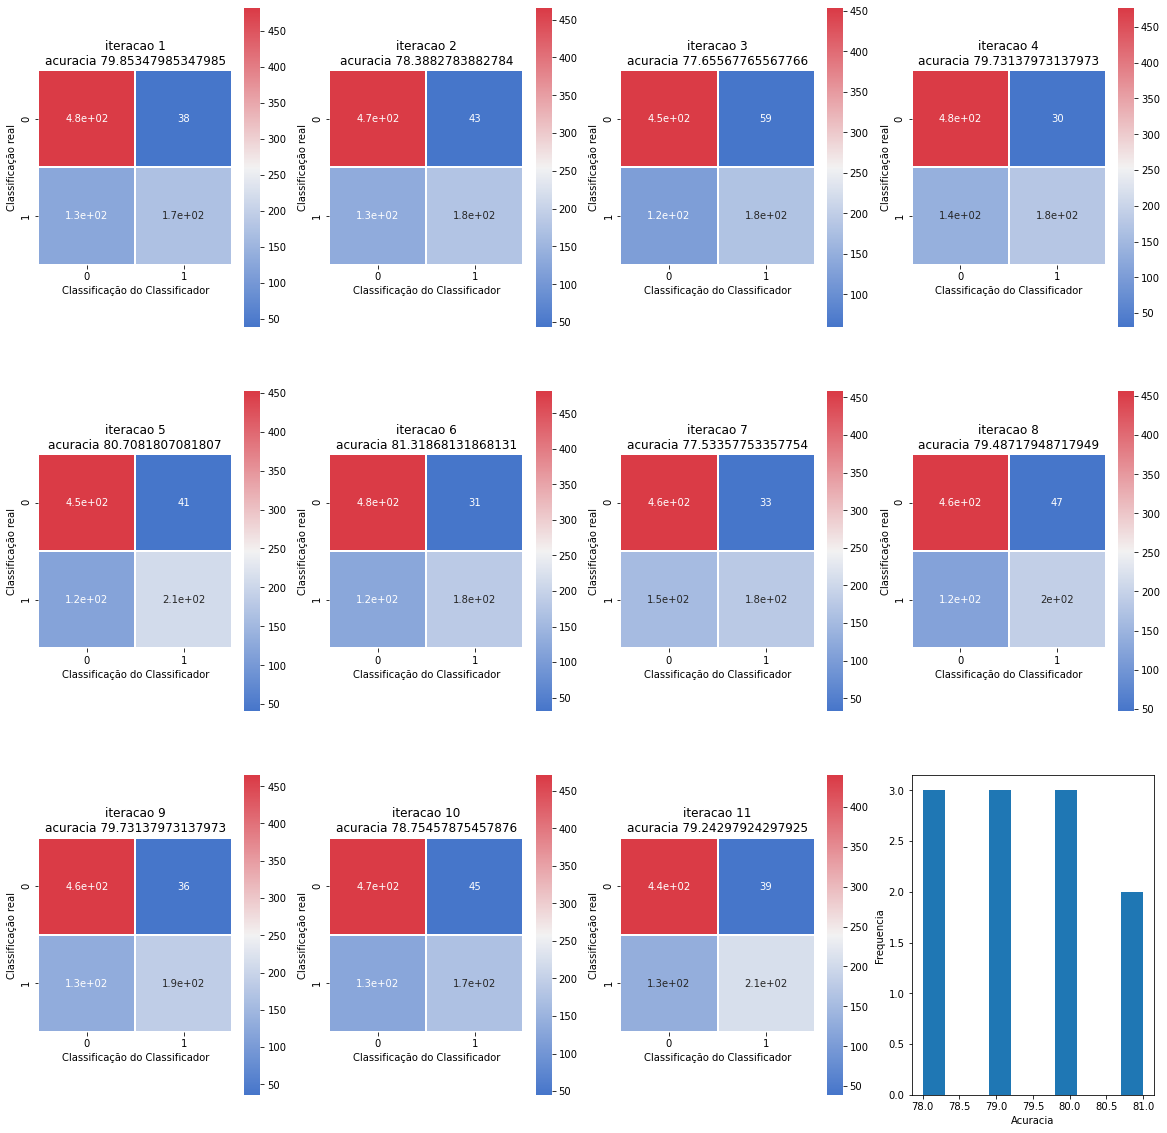

Sout


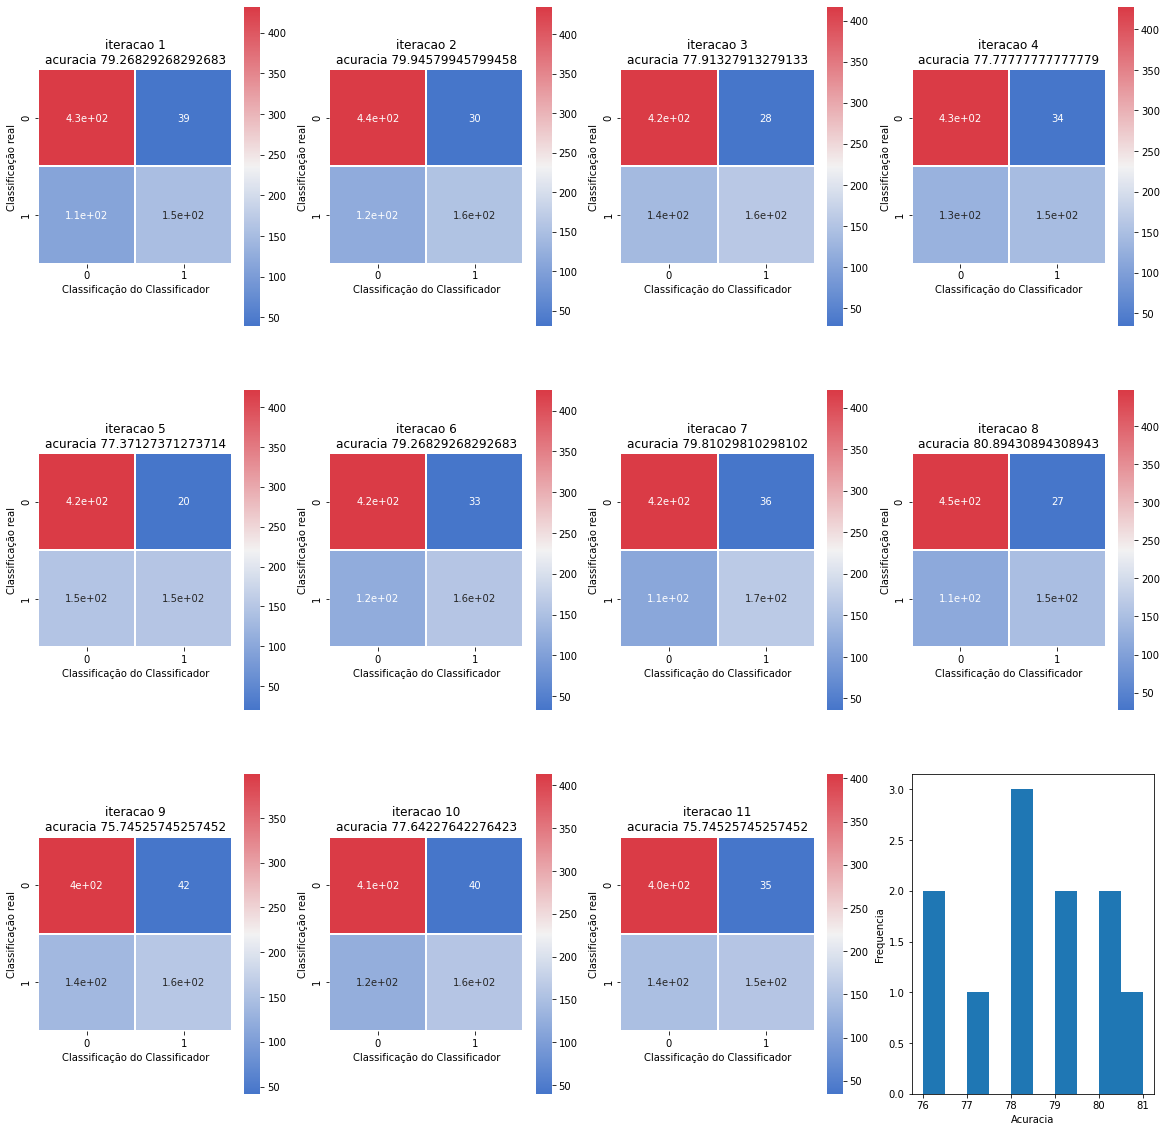

Cout                                                                \
             Vp   Vn  Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1   172  482  38  127       85.917786      79.853480        93.178718   
iteracao2   176  466  43  134       85.795686      78.388278        94.277539   
iteracao3   182  454  59  124       86.080586      77.655678        90.697674   
iteracao4   176  477  30  136       85.429385      79.731380        93.804035   
iteracao5   209  452  41  117       85.429385      80.708181        92.795389   
iteracao6   185  481  31  122       86.121286      81.318681        94.117647   
iteracao7   177  458  33  151       85.877086      77.533578        94.932936   
iteracao8   195  456  47  121       85.063085      79.487179        92.560801   
iteracao9   188  465  36  130       85.632886      79.731380        93.049645   
iteracao10  174  471  45  129       85.632886      78.754579        93.557423   
iteracao11  209  440  39  131       85.958486      79.242979        93.284672   

                           Sout                                               \
           precision_teste   Vp   Vn  Fp   Fn acuracia_treino acuracia_teste   
iteracao1        81.904762  153  432  39  114       85.901491      79.268293   
iteracao2        80.365297  155  435  30  118       86.940804      79.945799   
iteracao3        75.518672  158  417  28  135       87.211930      77.913279   
iteracao4        85.436893  146  428  34  130       86.172616      77.777778   
iteracao5        83.600000  150  421  20  147       86.985992      77.371274   
iteracao6        85.648148  160  425  33  120       86.669679      79.268293   
iteracao7        84.285714  168  421  36  113       86.714867      79.810298   
iteracao8        80.578512  150  447  27  114       85.946679      80.894309   
iteracao9        83.928571  160  399  42  137       87.889742      75.745257   
iteracao10       79.452055  160  413  40  125       86.308179      77.642276   
iteracao11       84.274194  154  405  35  144       86.262991      75.745257   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1         94.625407       79.687500        0.016295       0.585187   
iteracao2         96.084829       83.783784       -1.145119      -1.557521   
iteracao3         96.302521       84.946237       -1.131343      -0.257601   
iteracao4         94.599018       81.111111       -0.743231       1.953602   
iteracao5         96.563574       88.235294       -1.556606       3.336907   
iteracao6         95.847176       82.901554       -0.548393       2.050389   
iteracao7         95.394737       82.352941       -0.837781      -2.276721   
iteracao8         95.544554       84.745763       -0.883594      -1.407129   
iteracao9         96.065574       79.207921       -2.256857       3.986122   
iteracao10        94.991653       80.000000       -0.675293       1.112302   
iteracao11        95.025729       81.481481       -0.304505       3.497722   

                                             
           precision_treino precision_teste  
iteracao1         -1.446690        2.217262  
iteracao2         -1.807289       -3.418487  
iteracao3         -5.604847       -9.427564  
iteracao4         -0.794983        4.325782  
iteracao5         -3.768185       -4.635294  
iteracao6         -1.729529        2.746594  
iteracao7         -0.461801        1.932773  
iteracao8         -2.983753       -4.167250  
iteracao9         -3.015928        4.720651  
iteracao10        -1.434230       -0.547945  
iteracao11        -1.741057        2.792712

In [29]:
metricas(lista_tts, lista_XGB)

## Logistic Regression: Expectativas para os resultados gerados
*Explicação leve do XG, lembrando que os primeiros grpaficos são com outliers e os segundos sem.*

Cout


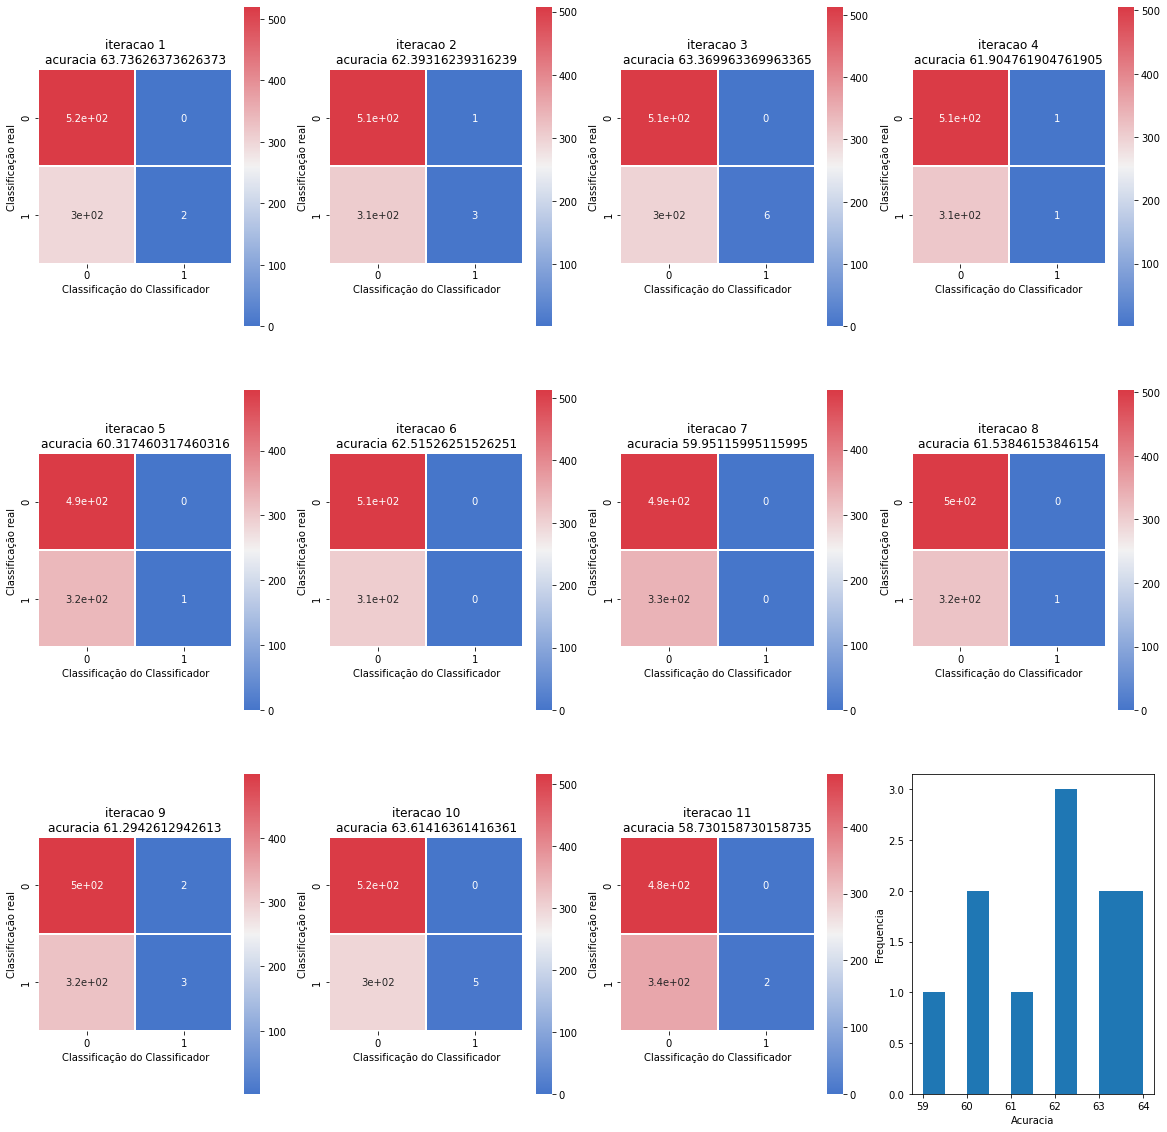

Sout


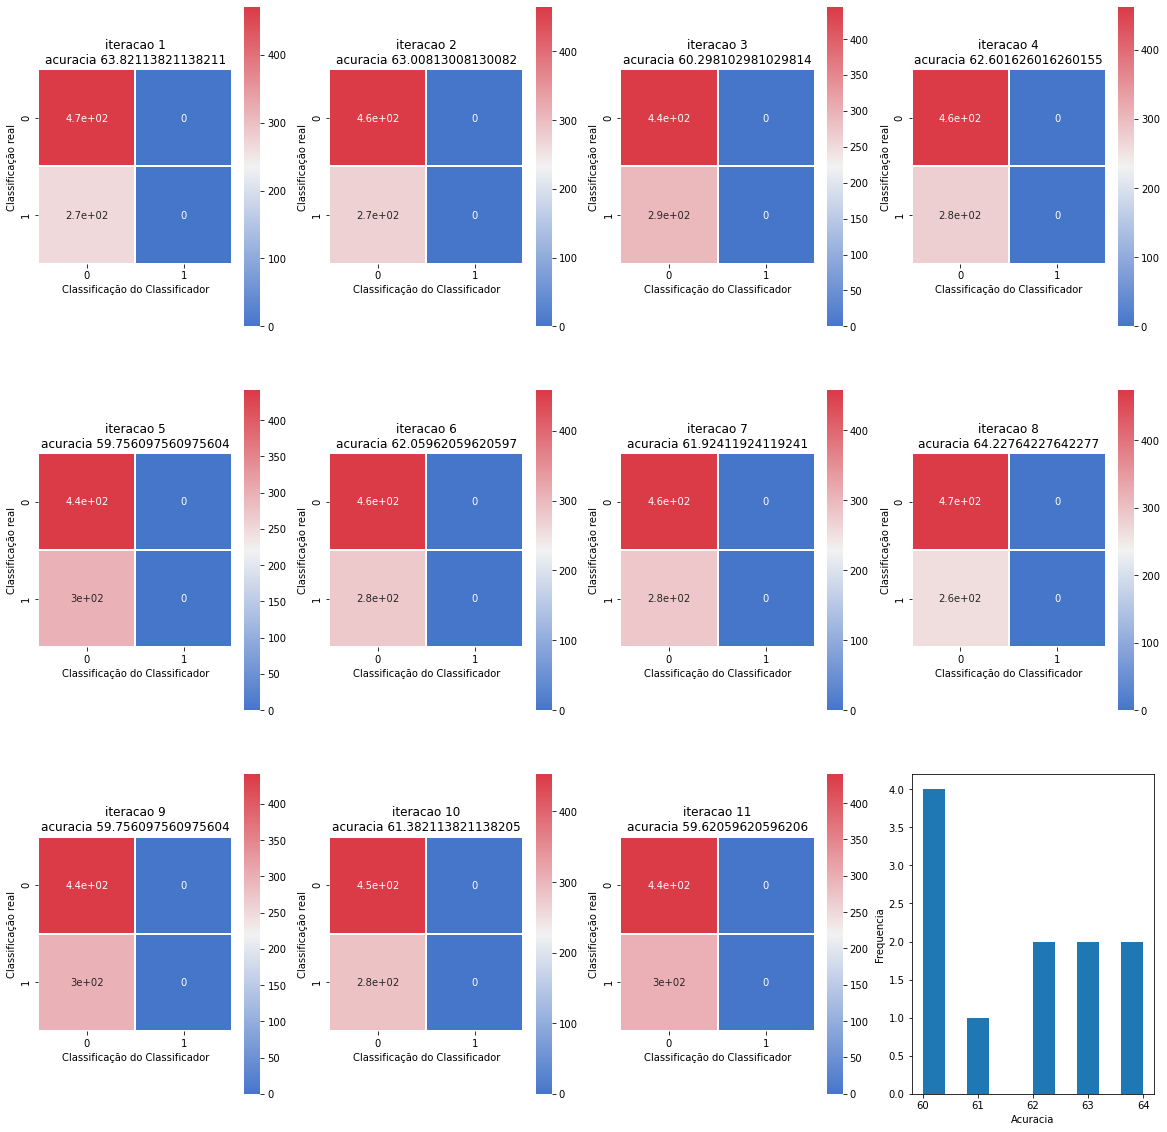

Cout                                                               \
             Vp   Vn Fp   Fn acuracia_treino acuracia_teste precision_treino   
iteracao1     2  520  0  297       60.439560      63.736264        81.818182   
iteracao2     3  508  1  307       60.887261      62.393162       100.000000   
iteracao3     6  513  0  300       61.009361      63.369963        85.000000   
iteracao4     1  506  1  311       60.846561      61.904762        75.000000   
iteracao5     1  493  0  325       61.294261      60.317460        60.000000   
iteracao6     0  512  0  307       60.480260      62.515263         0.000000   
iteracao7     0  491  0  328       61.416361      59.951160       100.000000   
iteracao8     1  503  0  315       61.050061      61.538462       100.000000   
iteracao9     3  499  2  315       61.172161      61.294261        71.428571   
iteracao10    5  516  0  298       60.805861      63.614164        83.333333   
iteracao11    2  479  0  338       61.986162      58.730159       100.000000   

                           Sout                                              \
           precision_teste   Vp   Vn Fp   Fn acuracia_treino acuracia_teste   
iteracao1            100.0    0  471  0  267       61.138726      63.821138   
iteracao2             75.0    0  465  0  273       61.409851      63.008130   
iteracao3            100.0    0  445  0  293       62.313601      60.298103   
iteracao4             50.0    0  462  0  276       61.545413      62.601626   
iteracao5            100.0    0  441  0  297       62.494352      59.756098   
iteracao6              0.0    0  458  0  280       61.726164      62.059621   
iteracao7              0.0    0  457  0  281       61.771351      61.924119   
iteracao8            100.0    0  474  0  264       61.048351      64.227642   
iteracao9             60.0    0  441  0  297       62.494352      59.756098   
iteracao10           100.0    0  453  0  285       61.952101      61.382114   
iteracao11           100.0    0  440  0  298       62.539539      59.620596   

                                                  Cout-Sout                 \
           precision_treino precision_teste acuracia_treino acuracia_teste   
iteracao1               0.0             0.0       -0.699165      -0.084874   
iteracao2               0.0             0.0       -0.522590      -0.614968   
iteracao3               0.0             0.0       -1.304240       3.071860   
iteracao4               0.0             0.0       -0.698853      -0.696864   
iteracao5               0.0             0.0       -1.200090       0.561363   
iteracao6               0.0             0.0       -1.245903       0.455642   
iteracao7               0.0             0.0       -0.354990      -1.972959   
iteracao8             100.0             0.0        0.001710      -2.689181   
iteracao9               0.0             0.0       -1.322190       1.538164   
iteracao10              0.0             0.0       -1.146240       2.232050   
iteracao11              0.0             0.0       -0.553377      -0.890437   

                                             
           precision_treino precision_teste  
iteracao1         81.818182           100.0  
iteracao2        100.000000            75.0  
iteracao3         85.000000           100.0  
iteracao4         75.000000            50.0  
iteracao5         60.000000           100.0  
iteracao6          0.000000             0.0  
iteracao7        100.000000             0.0  
iteracao8          0.000000           100.0  
iteracao9         71.428571            60.0  
iteracao10        83.333333           100.0  
iteracao11       100.000000           100.0

In [30]:
metricas(lista_tts, lista_LR)

## Neural Network (Simulated only once).
*Explicar porque já era esperado que o desempenho da Neural Network não iria ser plausível para o projeto*



### Com Outliers

In [31]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 2s 751us/step - loss: 0.6731 - accuracy: 0.6177
Epoch 2/50
2213/2213 [==============================] - 2s 947us/step - loss: 0.6538 - accuracy: 0.6290
Epoch 3/50
2213/2213 [==============================] - 2s 903us/step - loss: 0.6443 - accuracy: 0.6331
Epoch 4/50
2213/2213 [==============================] - 2s 927us/step - loss: 0.6402 - accuracy: 0.6448
Epoch 5/50
2213/2213 [==============================] - 2s 924us/step - loss: 0.6315 - accuracy: 0.6570
Epoch 6/50
2213/2213 [==============================] - 2s 986us/step - loss: 0.6352 - accuracy: 0.6710
Epoch 7/50
2213/2213 [==============================] - 3s 1ms/step - loss: 0.6317 - accuracy: 0.6728
Epoch 8/50
2213/2213 [==============================] - 2s 928us/step - loss: 0.6273 - accuracy: 0.6710
Epoch 9/50
2213/2213 [==============================] - 2s 921us/step - loss: 0.6264 - accuracy: 0.6796
Epoch 10/50
2213/2213 [==============================] - 2s 914us/

{'loss': 0.8305076956748962, 'accuracy': 0.6084010601043701}

### Sem Outliers

In [32]:
my_neural_network(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3], loss='binary_crossentropy', metrics=['accuracy'], epochs=50)

Epoch 1/50
2213/2213 [==============================] - 3s 905us/step - loss: 0.6679 - accuracy: 0.6245
Epoch 2/50
2213/2213 [==============================] - 2s 891us/step - loss: 0.6419 - accuracy: 0.6394
Epoch 3/50
2213/2213 [==============================] - 2s 887us/step - loss: 0.6261 - accuracy: 0.6728
Epoch 4/50
2213/2213 [==============================] - 2s 989us/step - loss: 0.6211 - accuracy: 0.6787
Epoch 5/50
2213/2213 [==============================] - 2s 1ms/step - loss: 0.6217 - accuracy: 0.6792
Epoch 6/50
2213/2213 [==============================] - 3s 1ms/step - loss: 0.6185 - accuracy: 0.6850
Epoch 7/50
2213/2213 [==============================] - 2s 975us/step - loss: 0.6180 - accuracy: 0.6878
Epoch 8/50
2213/2213 [==============================] - 2s 1ms/step - loss: 0.6186 - accuracy: 0.6909
Epoch 9/50
2213/2213 [==============================] - 2s 1ms/step - loss: 0.6227 - accuracy: 0.6959
Epoch 10/50
2213/2213 [==============================] - 3s 1ms/step - l

{'loss': 0.8479117751121521, 'accuracy': 0.6287263035774231}

# Considerações finais sobre os modelos e os dados gerados por eles.
*Explicação muito leve sobre NN. Explicar consideração de todos os modelos. Comentar que o NN é muito bom, pra não serve pra nossa base de dados porque é muito pequena, os dados acabariam antes do modelo chegar a uma conclusão confiável, visto que ele funciona muito melhor com grandes base de dados.*

# Evitando falsos positivos: a importância da definição correta
Nesse projeto, é necessário evitar falsos positivos, visto que, ao considerar uma água potável e segura para consumo quando isso não é verdade, ou seja, quando acontece um falso positivo, torna-se perigoso para a pessoa que for ingerir esta água. Assim, a chance de uma pessoa ingerir uma água teoricamente segura, quando perigosa, diminui. Como consequência, mais águas seguras serão descartadas, em virtude da segurança das pessoas que irão consumir a água.

# Random Forest

In [38]:
def RF_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    RF_clf = RandomForestC()
    RF_clf.fit(Train_X, Train_Y)
    RF_train_predicted_proba = RF_clf.predict_proba(Train_X)
    RF_train_pred = (RF_train_predicted_proba [:,1] >= 0.8).astype('int')
    RF_test_predicted_proba = RF_clf.predict_proba(Test_X)
    RF_test_pred = (RF_test_predicted_proba [:,1] >= 0.8).astype('int')
    RF_train_score = accuracy_score(Train_Y, RF_train_pred)*100
    RF_train_Precisionscore = precision_score(Train_Y, RF_train_pred)*100
    RF_test_score = accuracy_score(Test_Y, RF_test_pred)*100
    RF_test_Precisionscore = precision_score(Test_Y, RF_test_pred)*100
    return [[RF_train_score, RF_test_score, RF_test_pred], [RF_train_Precisionscore, RF_test_Precisionscore]]

# XG_BOOST

In [39]:
def XGB_Clf_Fn(Train_X, Test_X, Train_Y, Test_Y):
    XGB_clf = RandomForestC()
    XGB_clf.fit(Train_X, Train_Y)
    XGB_train_predicted_proba = XGB_clf.predict_proba(Train_X)
    XGB_train_pred = (XGB_train_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_test_predicted_proba = XGB_clf.predict_proba(Test_X)
    XGB_test_pred = (XGB_test_predicted_proba [:,1] >= 0.8).astype('int')
    XGB_train_score = accuracy_score(Train_Y, XGB_train_pred)*100
    XGB_train_Precisionscore = precision_score(Train_Y, XGB_train_pred)*100
    XGB_test_score = accuracy_score(Test_Y, XGB_test_pred)*100
    XGB_test_Precisionscore = precision_score(Test_Y, XGB_test_pred)*100
    return [[XGB_train_score, XGB_test_score, XGB_test_pred], [XGB_train_Precisionscore, XGB_test_Precisionscore]]

# Rodando os classificadores

In [35]:
listaCout_tts_Fn = []; listaSout_tts_Fn = []; lista_tts_Fn = [[], []]; lista_RF_Fn = [[], []]; lista_XGB_Fn = [[], []]
for i in range(11):
    ttCout_split = tts(df_agua1.drop(['Potability'], axis=1), df_agua1.Potability, test_size=0.25)
    ttSout_split = tts(df_agua1_Sout.drop(['Potability'], axis=1), df_agua1_Sout.Potability, test_size=0.25)
    lista_tts_Fn[0].append(ttCout_split)
    lista_tts_Fn[1].append(ttSout_split)
    lista_RF[0].append(RF_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_RF[1].append(RF_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))
    lista_XGB[0].append(XGB_Clf_Fn(ttCout_split[0], ttCout_split[1], ttCout_split[2], ttCout_split[3]))
    lista_XGB[1].append(XGB_Clf_Fn(ttSout_split[0], ttSout_split[1], ttSout_split[2], ttSout_split[3]))

# Random Forets
*Explicação de porque é melhot haver acurácia mais baixa com precisão (% verdadeiros) maior*

Cout


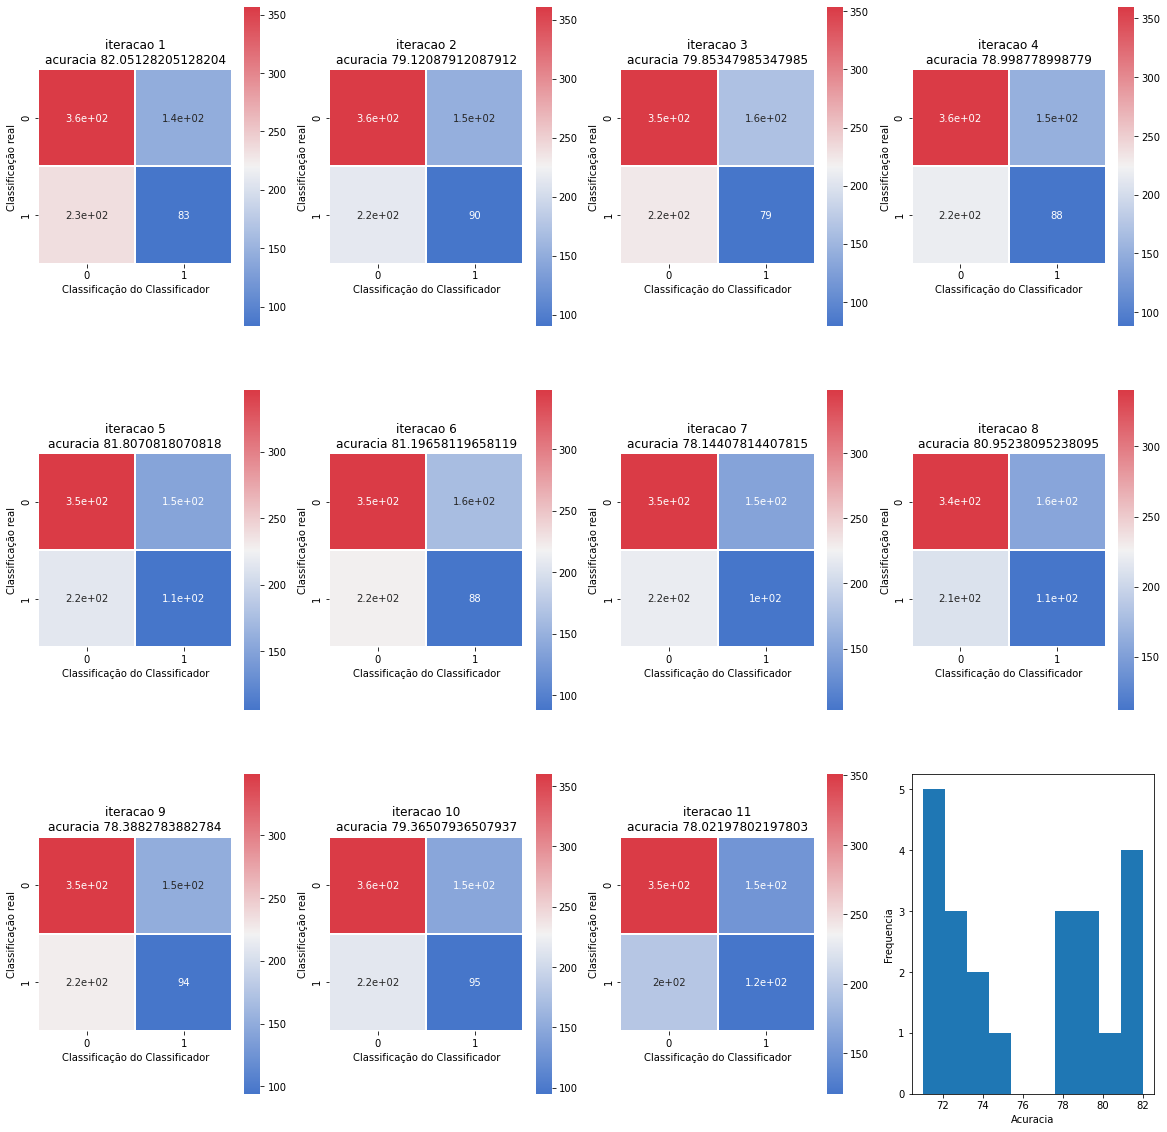

Sout


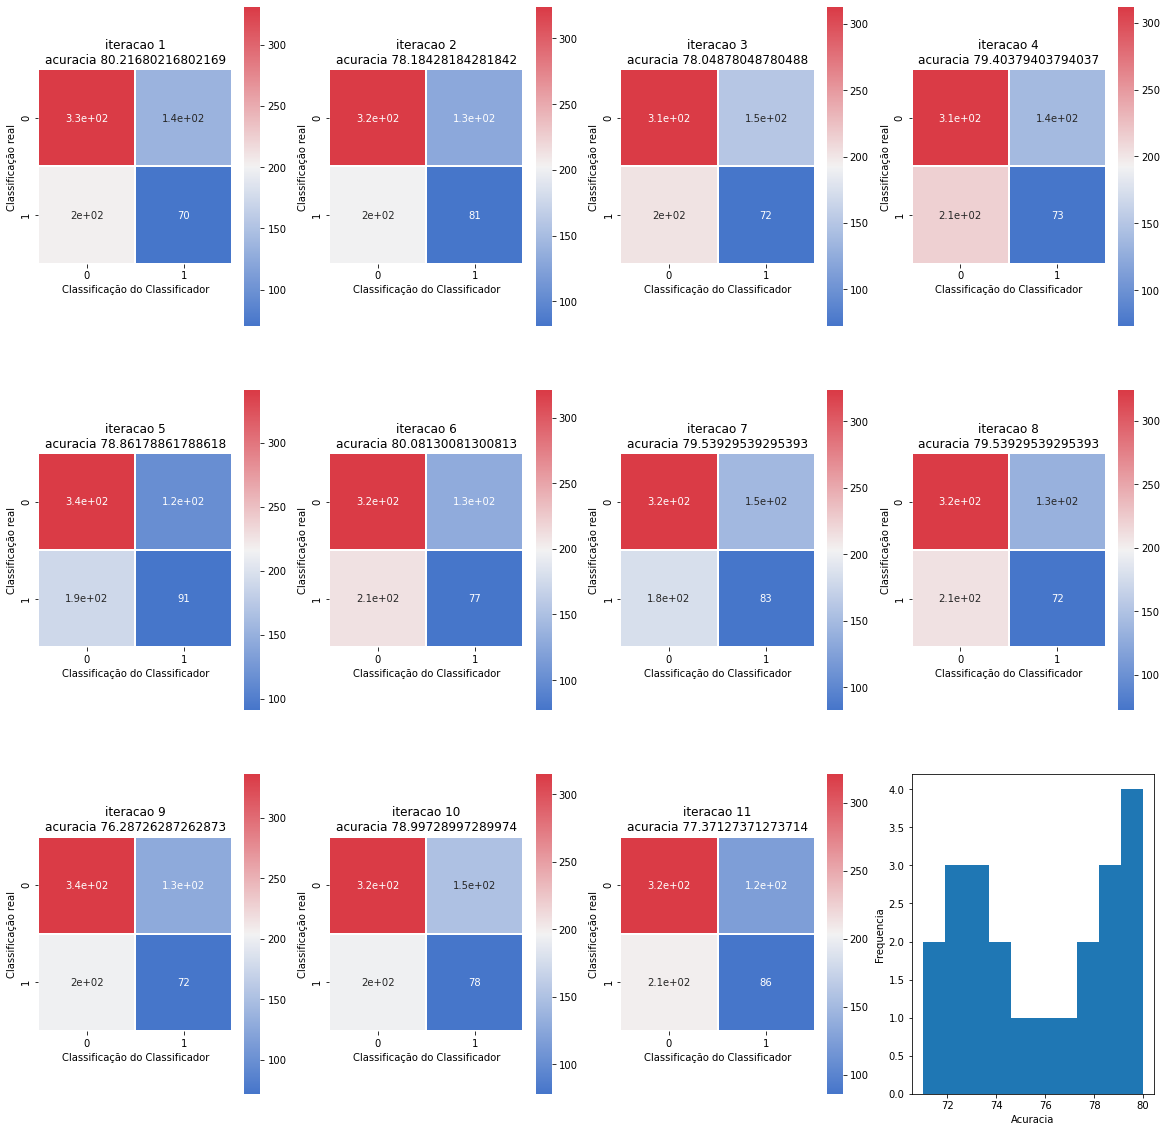

Cout                                                \
             Vp   Vn   Fp   Fn acuracia_treino acuracia_teste   
iteracao1    83  357  145  234           100.0      82.051282   
iteracao2    90  361  153  215           100.0      79.120879   
iteracao3    79  354  162  224           100.0      79.853480   
iteracao4    88  360  152  219           100.0      78.998779   
iteracao5   106  346  151  216           100.0      81.807082   
iteracao6    88  348  163  220           100.0      81.196581   
iteracao7   103  348  148  220           100.0      78.144078   
iteracao8   112  340  156  211           100.0      80.952381   
iteracao9    94  349  151  225           100.0      78.388278   
iteracao10   95  360  147  217           100.0      79.365079   
iteracao11  121  351  151  196           100.0      78.021978   

                                            Sout                 \
           precision_treino precision_teste   Vp   Vn   Fp   Fn   
iteracao1             100.0       83.333333   70  331  135  202   
iteracao2             100.0       78.600823   81  324  131  202   
iteracao3             100.0       79.253112   72  313  151  202   
iteracao4             100.0       79.166667   73  312  139  214   
iteracao5             100.0       84.435798   91  341  116  190   
iteracao6             100.0       80.478088   77  321  130  210   
iteracao7             100.0       79.681275   83  323  147  185   
iteracao8             100.0       79.850746   72  324  133  209   
iteracao9             100.0       78.775510   72  336  128  202   
iteracao10            100.0       77.685950   78  315  150  195   
iteracao11            100.0       79.411765   86  321  125  206   

                                                                            \
           acuracia_treino acuracia_teste precision_treino precision_teste   
iteracao1            100.0      80.216802            100.0       79.512195   
iteracao2            100.0      78.184282            100.0       76.415094   
iteracao3            100.0      78.048780            100.0       79.372197   
iteracao4            100.0      79.403794            100.0       79.245283   
iteracao5            100.0      78.861789            100.0       84.057971   
iteracao6            100.0      80.081301            100.0       82.125604   
iteracao7            100.0      79.539295            100.0       78.260870   
iteracao8            100.0      79.539295            100.0       77.560976   
iteracao9            100.0      76.287263            100.0       80.500000   
iteracao10           100.0      78.997290            100.0       78.508772   
iteracao11           100.0      77.371274            100.0       81.042654   

                 Cout-Sout                                                  
           acuracia_treino acuracia_teste precision_treino precision_teste  
iteracao1              0.0       1.834480              0.0        3.821138  
iteracao2              0.0       0.936597              0.0        2.185729  
iteracao3              0.0       1.804699              0.0       -0.119085  
iteracao4              0.0      -0.405015              0.0       -0.078616  
iteracao5              0.0       2.945293              0.0        0.377827  
iteracao6              0.0       1.115280              0.0       -1.647516  
iteracao7              0.0      -1.395217              0.0        1.420405  
iteracao8              0.0       1.413086              0.0        2.289771  
iteracao9              0.0       2.101016              0.0       -1.724490  
iteracao10             0.0       0.367789              0.0       -0.822822  
iteracao11             0.0       0.650704              0.0       -1.630889

In [36]:
metricas(lista_tts_Fn, lista_RF)

# XG_BOOST
*Mesma explicação que acima*

Cout


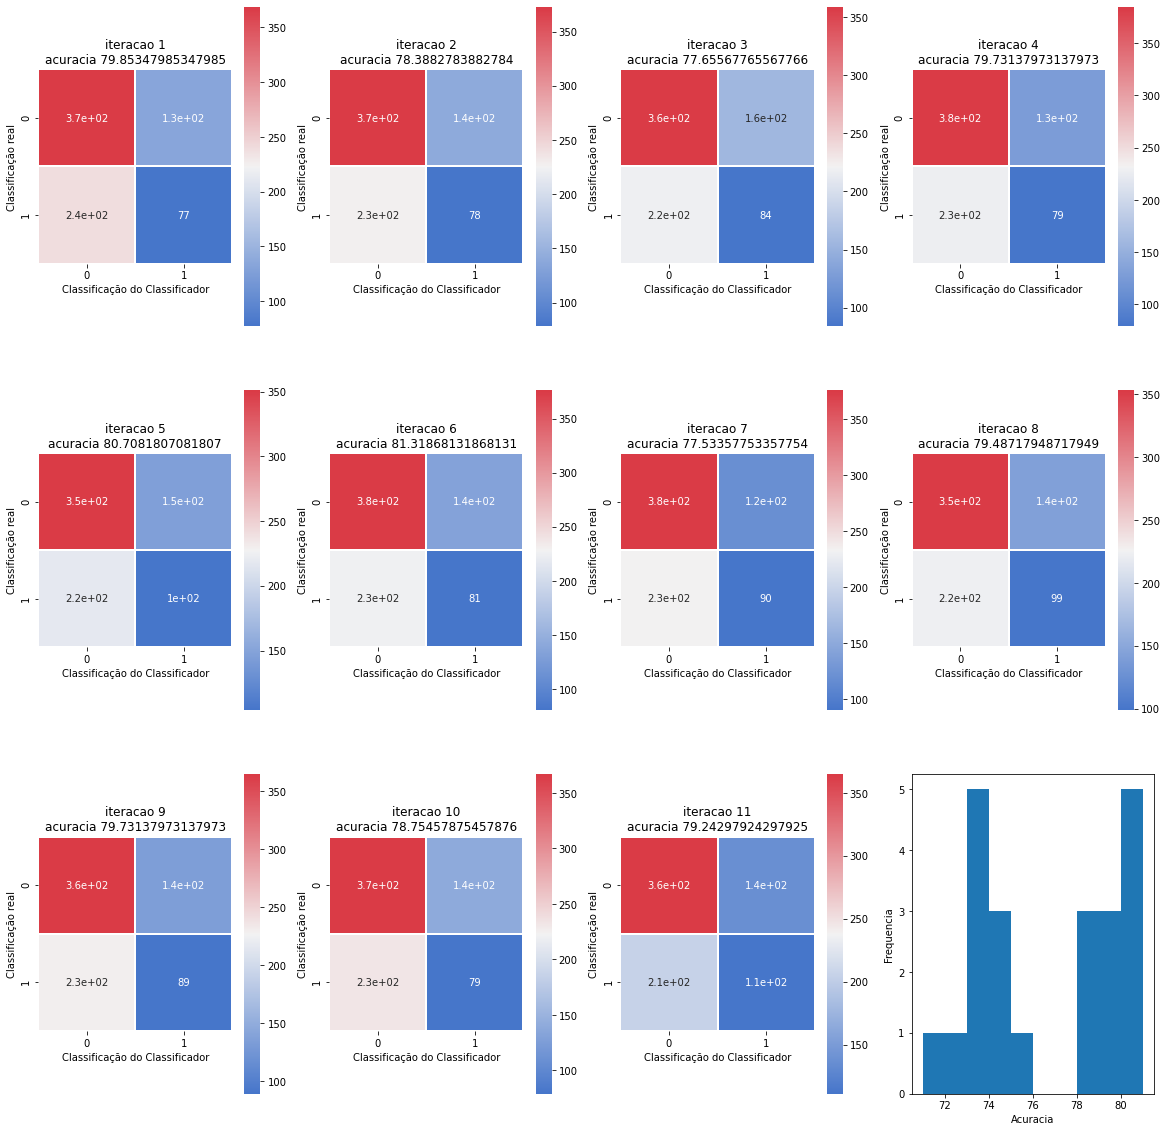

Sout


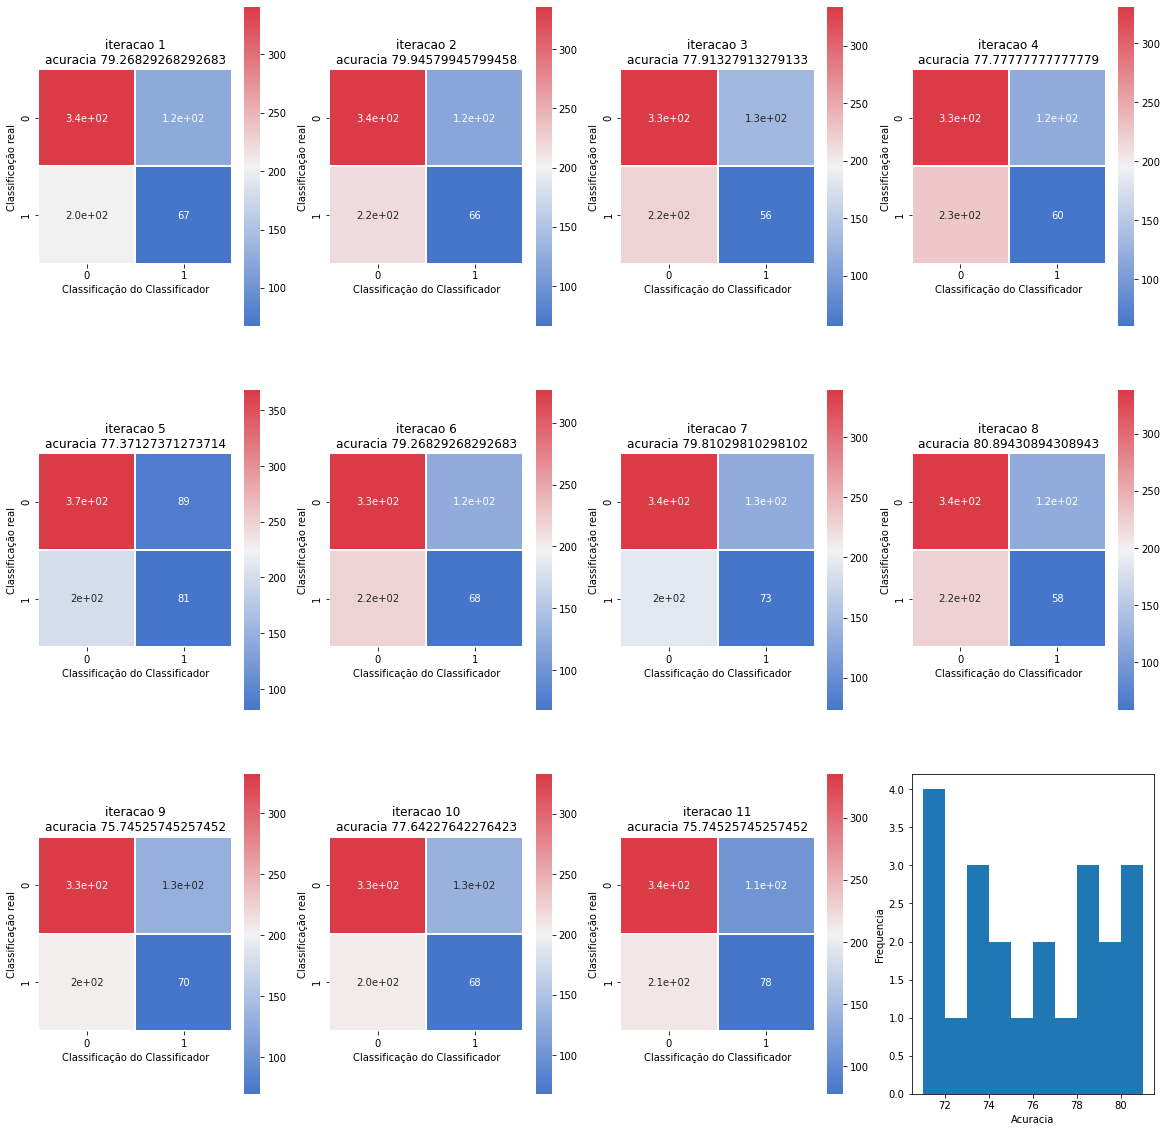

Cout                                                \
             Vp   Vn   Fp   Fn acuracia_treino acuracia_teste   
iteracao1    77  369  133  240       85.917786      79.853480   
iteracao2    78  373  141  227       85.795686      78.388278   
iteracao3    84  359  157  219       86.080586      77.655678   
iteracao4    79  385  127  228       85.429385      79.731380   
iteracao5   104  351  146  218       85.429385      80.708181   
iteracao6    81  376  135  227       86.121286      81.318681   
iteracao7    90  376  120  233       85.877086      77.533578   
iteracao8    99  353  143  224       85.063085      79.487179   
iteracao9    89  365  135  230       85.632886      79.731380   
iteracao10   79  367  140  233       85.632886      78.754579   
iteracao11  111  365  137  206       85.958486      79.242979   

                                            Sout                 \
           precision_treino precision_teste   Vp   Vn   Fp   Fn   
iteracao1         93.178718       81.904762   67  341  125  205   
iteracao2         94.277539       80.365297   66  336  119  217   
iteracao3         90.697674       75.518672   56  334  130  218   
iteracao4         93.804035       85.436893   60  331  120  227   
iteracao5         92.795389       83.600000   81  368   89  200   
iteracao6         94.117647       85.648148   68  326  125  219   
iteracao7         94.932936       84.285714   73  339  131  195   
iteracao8         92.560801       80.578512   58  338  119  223   
iteracao9         93.049645       83.928571   70  332  132  204   
iteracao10        93.557423       79.452055   68  333  132  205   
iteracao11        93.284672       84.274194   78  335  111  214   

                                                                            \
           acuracia_treino acuracia_teste precision_treino precision_teste   
iteracao1        85.901491      79.268293        94.625407       79.687500   
iteracao2        86.940804      79.945799        96.084829       83.783784   
iteracao3        87.211930      77.913279        96.302521       84.946237   
iteracao4        86.172616      77.777778        94.599018       81.111111   
iteracao5        86.985992      77.371274        96.563574       88.235294   
iteracao6        86.669679      79.268293        95.847176       82.901554   
iteracao7        86.714867      79.810298        95.394737       82.352941   
iteracao8        85.946679      80.894309        95.544554       84.745763   
iteracao9        87.889742      75.745257        96.065574       79.207921   
iteracao10       86.308179      77.642276        94.991653       80.000000   
iteracao11       86.262991      75.745257        95.025729       81.481481   

                 Cout-Sout                                                  
           acuracia_treino acuracia_teste precision_treino precision_teste  
iteracao1         0.016295       0.585187        -1.446690        2.217262  
iteracao2        -1.145119      -1.557521        -1.807289       -3.418487  
iteracao3        -1.131343      -0.257601        -5.604847       -9.427564  
iteracao4        -0.743231       1.953602        -0.794983        4.325782  
iteracao5        -1.556606       3.336907        -3.768185       -4.635294  
iteracao6        -0.548393       2.050389        -1.729529        2.746594  
iteracao7        -0.837781      -2.276721        -0.461801        1.932773  
iteracao8        -0.883594      -1.407129        -2.983753       -4.167250  
iteracao9        -2.256857       3.986122        -3.015928        4.720651  
iteracao10       -0.675293       1.112302        -1.434230       -0.547945  
iteracao11       -0.304505       3.497722        -1.741057        2.792712

In [37]:
metricas(lista_tts_Fn, lista_XGB)

# Considerações finais do projeto. 
*Os resultados obtidos são satisfatórios? Qual o melhor modelo? E por que? Também, comentar um pouco sobre cada modelo e porque foi usado o Random Forest/ GX Boost, com/sem outliers (lembrando que precisão > acurácia). Falar que apenas esse modelos foram modelados de forma tendenciosa, porque não havia razão para usar esse recurso nas outras opções.*

## Fontes

https://www.datageeks.com.br/xgboost/

https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4

https://medium.com/@msremigio/regress%C3%A3o-log%C3%ADstica-logistic-regression-997c6259ff9a

https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/

https://www.datageeks.com.br/naive-bayes/

https://minerandodados.com.br/tratando-outliers-python/

https://sigmoidal.ai/como-implementar-regressao-linear-com-python/